In [1]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [3]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2021-04-19T12:37:57.865,2021-04-11T22:02:53.549443
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [4]:
mat = sb.matches(competition_id=43, season_id=3)

credentials were not supplied. open data access only


In [5]:
mat.columns

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'data_version',
       'shot_fidelity_version', 'xy_fidelity_version'],
      dtype='object')

In [6]:
E = mat[(mat['away_score']>3) | (mat['home_score']>3)]
E

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
21,7580,2018-06-30,21:00:00.000,International - FIFA World Cup,2018,France,Argentina,4,3,available,unscheduled,2020-07-29T05:00,None,4,Round of 16,NaN,NaN,1.0.2,None,None
24,8658,2018-07-15,17:00:00.000,International - FIFA World Cup,2018,France,Croatia,4,2,available,unscheduled,2020-07-29T05:00,None,7,Final,Stadion Luzhniki,N. Pitana,1.0.2,None,None
31,7552,2018-06-23,14:00:00.000,International - FIFA World Cup,2018,Belgium,Tunisia,5,2,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Otkrytiye Arena,J. Marrufo,1.0.2,None,None
44,7525,2018-06-14,17:00:00.000,International - FIFA World Cup,2018,Russia,Saudi Arabia,5,0,available,unscheduled,2020-07-29T05:00,None,1,Group Stage,Stadion Luzhniki,N. Pitana,1.0.2,None,None
50,7554,2018-06-24,14:00:00.000,International - FIFA World Cup,2018,England,Panama,6,1,available,unscheduled,2020-07-29T05:00,None,2,Group Stage,Stadion Nizhny Novgorod,Ghead Grisha,1.0.2,None,None


In [8]:
events = sb.events(match_id = 7554)
events

credentials were not supplied. open data access only


,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,duel_outcome,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 352, 'lineup': [{'player': {'id'...",England,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",Panama,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Panama,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,England,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Abdiel Arroyo Molinar,NaN,Panama,00:23:32.800,Substitution,NaN
3571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Felipe Abdiel Baloy Ramírez,NaN,Panama,00:23:33.733,Substitution,NaN
3572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Danny Rose,NaN,England,00:24:22.680,Substitution,NaN
3573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",Panama,00:24:19.640,Tactical Shift,NaN


In [9]:
events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height',

In [18]:
E_pass = events[['type', 'pass_angle', 'pass_height', 'pass_length', 'pass_outcome']]
E_pass

,type,pass_angle,pass_height,pass_length,pass_outcome
0,Starting XI,NaN,NaN,NaN,NaN
1,Starting XI,NaN,NaN,NaN,NaN
2,Half Start,NaN,NaN,NaN,NaN
3,Half Start,NaN,NaN,NaN,NaN
4,Half Start,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3570,Substitution,NaN,NaN,NaN,NaN
3571,Substitution,NaN,NaN,NaN,NaN
3572,Substitution,NaN,NaN,NaN,NaN
3573,Tactical Shift,NaN,NaN,NaN,NaN


In [19]:
E_pass = E_pass[E_pass['type'] == 'Pass']
E_pass

,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,-3.079174,Ground Pass,16.031220,NaN
7,Pass,-1.465919,Ground Pass,19.104973,NaN
8,Pass,-0.904827,Ground Pass,17.804493,NaN
9,Pass,1.698306,Ground Pass,39.319206,NaN
10,Pass,-0.896055,Ground Pass,6.403124,NaN
...,...,...,...,...,...
1014,Pass,-0.523278,Ground Pass,30.016663,NaN
1015,Pass,-2.265535,Ground Pass,23.430750,NaN
1016,Pass,-0.110657,Ground Pass,18.110771,NaN
1017,Pass,-0.291457,Ground Pass,10.440307,NaN


In [20]:
E_pass.pass_height.unique()

array(['Ground Pass', 'High Pass', 'Low Pass'], dtype=object)

### Apply a particular score to the *pass_height* and to the *pass_outcome*

In [21]:
E_pass['pass_height'] = E_pass['pass_height'].replace(['Ground Pass', 'High Pass', 'Low Pass'], [3, 1, 2])
E_pass

<ipython-input-21-fc7b1a033553>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_pass['pass_height'] = E_pass['pass_height'].replace(['Ground Pass', 'High Pass', 'Low Pass'], [3, 1, 2])


,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,-3.079174,3,16.031220,NaN
7,Pass,-1.465919,3,19.104973,NaN
8,Pass,-0.904827,3,17.804493,NaN
9,Pass,1.698306,3,39.319206,NaN
10,Pass,-0.896055,3,6.403124,NaN
...,...,...,...,...,...
1014,Pass,-0.523278,3,30.016663,NaN
1015,Pass,-2.265535,3,23.430750,NaN
1016,Pass,-0.110657,3,18.110771,NaN
1017,Pass,-0.291457,3,10.440307,NaN


In [22]:
E_pass.pass_outcome.unique()

array([nan, 'Incomplete', 'Out', 'Pass Offside', 'Unknown',
       'Injury Clearance'], dtype=object)

In [23]:
E_pass['pass_outcome'] = E_pass['pass_outcome'].fillna(1)
E_pass

<ipython-input-23-3e78a7b7e735>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_pass['pass_outcome'] = E_pass['pass_outcome'].fillna(1)


,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,-3.079174,3,16.031220,1
7,Pass,-1.465919,3,19.104973,1
8,Pass,-0.904827,3,17.804493,1
9,Pass,1.698306,3,39.319206,1
10,Pass,-0.896055,3,6.403124,1
...,...,...,...,...,...
1014,Pass,-0.523278,3,30.016663,1
1015,Pass,-2.265535,3,23.430750,1
1016,Pass,-0.110657,3,18.110771,1
1017,Pass,-0.291457,3,10.440307,1


In [24]:
E_pass['pass_outcome'] = E_pass['pass_outcome'].replace(['Unknown', 'Incomplete', 'Out', 'Pass Offside', 'Injury Clearance'], [0, -1, -2, -3, -4])
E_pass

<ipython-input-24-167d8082a0fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E_pass['pass_outcome'] = E_pass['pass_outcome'].replace(['Unknown', 'Incomplete', 'Out', 'Pass Offside', 'Injury Clearance'], [0, -1, -2, -3, -4])


,type,pass_angle,pass_height,pass_length,pass_outcome
6,Pass,-3.079174,3,16.031220,1
7,Pass,-1.465919,3,19.104973,1
8,Pass,-0.904827,3,17.804493,1
9,Pass,1.698306,3,39.319206,1
10,Pass,-0.896055,3,6.403124,1
...,...,...,...,...,...
1014,Pass,-0.523278,3,30.016663,1
1015,Pass,-2.265535,3,23.430750,1
1016,Pass,-0.110657,3,18.110771,1
1017,Pass,-0.291457,3,10.440307,1


In [25]:
E_pass.pass_outcome.unique()

array([ 1, -1, -2, -3,  0, -4], dtype=int64)

In [26]:
E_pass = E_pass[['pass_angle', 'pass_height', 'pass_length', 'pass_outcome']]
E_pass

,pass_angle,pass_height,pass_length,pass_outcome
6,-3.079174,3,16.031220,1
7,-1.465919,3,19.104973,1
8,-0.904827,3,17.804493,1
9,1.698306,3,39.319206,1
10,-0.896055,3,6.403124,1
...,...,...,...,...
1014,-0.523278,3,30.016663,1
1015,-2.265535,3,23.430750,1
1016,-0.110657,3,18.110771,1
1017,-0.291457,3,10.440307,1


### Here *pass_outcome* is the dependent variable and the other columns represent the independent variables

In [27]:
x = E_pass[['pass_angle', 'pass_height', 'pass_length']]
y = E_pass['pass_outcome']
x.shape, y.shape

((1013, 3), (1013,))

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.35, random_state = 0)

In [29]:
x_train

,pass_angle,pass_height,pass_length
590,1.304544,3,11.401754
973,2.944197,1,10.198039
166,1.570796,3,14.000000
996,-0.997830,2,36.891735
1018,1.030377,3,23.323807
...,...,...,...
841,-2.191046,3,17.204650
198,-0.669043,1,54.817880
635,-0.844154,3,12.041595
565,2.034444,3,13.416408


### Now we apply the Naive Bayes Classifier and build the model

In [30]:
nb = GaussianNB()

### We use the training data to fit the model

In [31]:
nb.fit(x_train, y_train)

GaussianNB()

### We can now predict on the remaining test data

In [32]:
y_predicted = nb.predict(x_test)
y_predicted

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

### We will now generate the *Error Matrix* also known as the *Confusion Matrix* which will tell us how accurate our model is

<AxesSubplot:xlabel='Predicted', ylabel='Original'>

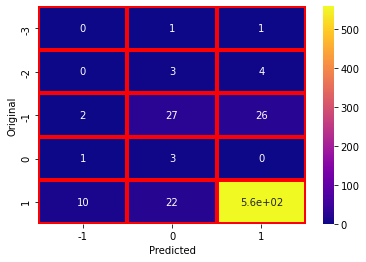

In [39]:
error_matrix = pd.crosstab(y_test, y_predicted, rownames=['Original'], colnames=['Predicted'])
sns.heatmap(error_matrix, annot=True, cmap = 'plasma', linewidths = 3, linecolor = 'red')

In [40]:
accuracy = metrics.accuracy_score(y_test, y_predicted)
accuracy

0.8558421851289834

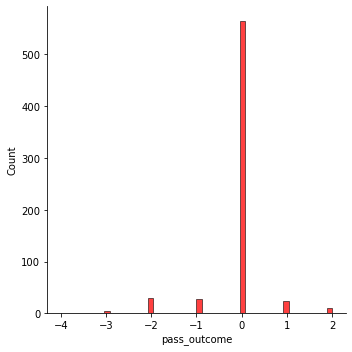

In [41]:
sns.displot((y_test - y_predicted), bins = 50, color = 'red')